In [1]:
# Import packages
import numpy as np
import pandas as pd
from datetime import datetime, date, time, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
# Get the parent directory and add it to sys.path
parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from functions_nico.nico_preprocessing import load_data
from functions_nico.nico_models import baseline_model, print_model, split_data

/Users/nicoschreiber/Desktop/Neue_Fische/Python/FuelProphet/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load data
predictions = pd.read_parquet("../data/extra/wh_sarima.parquet")

# Load data
df = load_data("../data/fueldata/wertheim_23-25.parquet")

In [3]:
# Prepare data
predictions = predictions.reset_index(names="datetime")
predictions.columns=["datetime","e5"]

predictions = predictions[predictions["datetime"] >= pd.to_datetime("2025-04-30")]
predictions = predictions[predictions["datetime"]<pd.to_datetime("2025-05-02")]
df = df[df["datetime"]>pd.to_datetime("2025-04-28")]
df = df[df["station_uuid"] == "fb0f8030-c1eb-4df1-9410-054eea7422ad"]

/Users/nicoschreiber/Desktop/Neue_Fische/Python/FuelProphet/functions_nico/nico_models.py:223: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


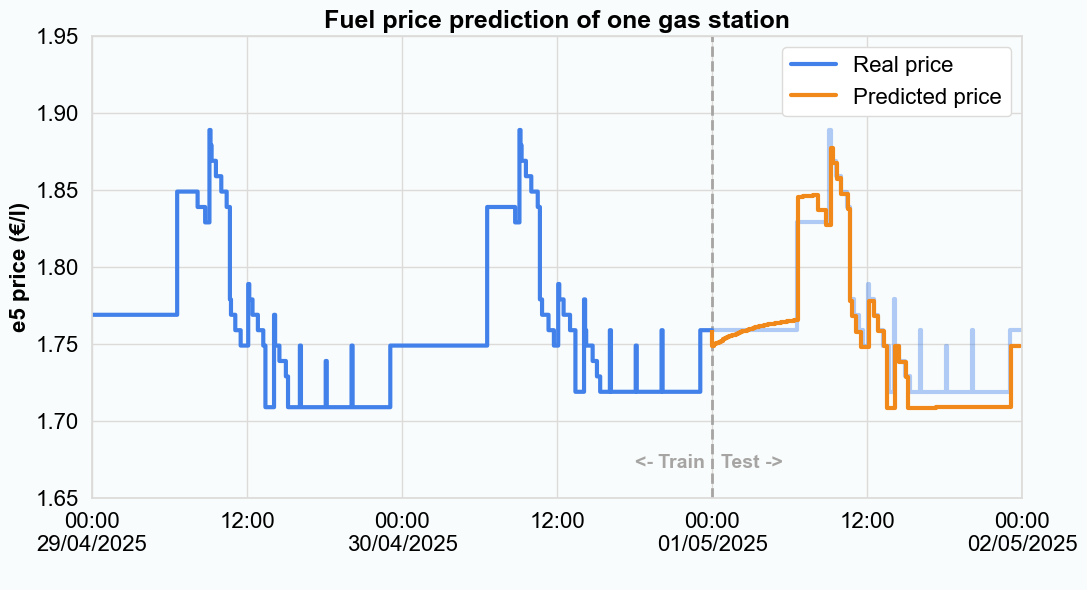

RMSE: 0.009
MAE: 0.007
R2: 0.951


In [4]:
params = {"background":"#f9fcfc",
          "gridcolor": "#dcdbd9",
          "legendedge": "#dcdbd9",
          "legendface": "white",
          "legendcol": "black",
          "textcolor": "black"
          }

print_model(df,predictions,x="datetime",y="e5",xlim=("2025-04-29","2025-05-02"),ylim=(1.65,1.95),title = "Fuel price prediction of one gas station",params = params)